In [1]:
import pandas as pd
# df = pd.read_csv('https://raw.githubusercontent.com/TheifX/datacw/main/diabetic_data.csv?token=GHSAT0AAAAAABSGKJ2ROZNBPN64PAA5ZAB2YRMRSLQ')
df = pd.read_csv('diabetic_data.csv')


df.shape


(101766, 50)

# <font color=red>Start of 1.1 Data cleaning and transformation</font>

## a. Show the shape of the dataframe. Replace all missing values with the numpy.nan.

In [2]:
import numpy as np

df = df.replace('?', np.nan) # replace ? with nan
# # data = df.replace('^\s+', np.nan, regex=True) # replace empty spaces with nan
pd.isnull(df).sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

## b. Drop all columns that have more than 50% of missing values. You can also drop columns for which over 95% of their values are the same.

In [3]:
percentage = int(((100-50)/100)*df.shape[0] + 1)
df = df.dropna(thresh=percentage, axis=1)
Percentage_missing = df.isnull().sum() * 100 / len(df)
missing_value = pd.DataFrame({'percent_missing': Percentage_missing})
print(missing_value)

                          percent_missing
encounter_id                     0.000000
patient_nbr                      0.000000
race                             2.233555
gender                           0.000000
age                              0.000000
admission_type_id                0.000000
discharge_disposition_id         0.000000
admission_source_id              0.000000
time_in_hospital                 0.000000
payer_code                      39.557416
medical_specialty               49.082208
num_lab_procedures               0.000000
num_procedures                   0.000000
num_medications                  0.000000
number_outpatient                0.000000
number_emergency                 0.000000
number_inpatient                 0.000000
diag_1                           0.020636
diag_2                           0.351787
diag_3                           1.398306
number_diagnoses                 0.000000
max_glu_serum                    0.000000
A1Cresult                        0

In [4]:
a = (df['race'].value_counts()/df['race'].count())*100
same = pd.DataFrame({'same_percentage': a})
print(same)
column = same["same_percentage"]
max_value = column.max()
if  max_value> 95.00:
    print ("more than 95 %")
else:
    print(" percentage" + str(max_value))

                 same_percentage
Caucasian              76.486788
AfricanAmerican        19.307891
Hispanic                2.047380
Other                   1.513674
Asian                   0.644266
 percentage76.48678801523725


In [5]:
for (columnName,i) in df.iteritems():
    a = (df[columnName].value_counts()/df[columnName].count())*100
    same = pd.DataFrame({'same_percentage': a})
    column = same["same_percentage"]
    max_value = column.max()
    if  max_value> 95.00:
       print (columnName+" more than 95 %, dropped")
       df.drop(columnName, inplace=True, axis = 1)

    else:
       print(columnName+" passed")

encounter_id passed
patient_nbr passed
race passed
gender passed
age passed
admission_type_id passed
discharge_disposition_id passed
admission_source_id passed
time_in_hospital passed
payer_code passed
medical_specialty passed
num_lab_procedures passed
num_procedures passed
num_medications passed
number_outpatient passed
number_emergency passed
number_inpatient passed
diag_1 passed
diag_2 passed
diag_3 passed
number_diagnoses passed
max_glu_serum passed
A1Cresult passed
metformin passed
repaglinide more than 95 %, dropped
nateglinide more than 95 %, dropped
chlorpropamide more than 95 %, dropped
glimepiride passed
acetohexamide more than 95 %, dropped
glipizide passed
glyburide passed
tolbutamide more than 95 %, dropped
pioglitazone passed
rosiglitazone passed
acarbose more than 95 %, dropped
miglitol more than 95 %, dropped
troglitazone more than 95 %, dropped
tolazamide more than 95 %, dropped
examide more than 95 %, dropped
citoglipton more than 95 %, dropped
insulin passed
glyburid

In [6]:
#df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]
df.shape

(101766, 33)

## c. Transform the age to be the middle value in each given range.

In [7]:
#range age to middle value
RangeAge = df.age.str.extract('(\d+)-(\d+)')
df.age = RangeAge.astype('int').mean(axis=1).astype('int').round(0)

df.loc[:, ['age']]

,age
0,5
1,15
2,25
3,35
4,45
...,...
101761,75
101762,85
101763,75
101764,85


## d. Replace possible missing values in the columns diag_1, diag_2, and diag_3 by the number 0.

In [8]:
#replace all NaN to 0 in diag_1/2/3
df['diag_1'] = df['diag_1'].fillna(0)
df['diag_2'] = df['diag_2'].fillna(0)
df['diag_3'] = df['diag_3'].fillna(0)

df.loc[:, ['diag_1','diag_2','diag_3']]

,diag_1,diag_2,diag_3
0,250.83,0,0
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
...,...,...,...
101761,250.13,291,458
101762,560,276,787
101763,38,590,296
101764,996,285,998


In [9]:
df.loc[:, :]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15,1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45,1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,75,1,3,7,3,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,85,1,4,5,5,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,75,1,1,7,1,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,85,2,3,7,10,MC,...,No,No,Steady,No,Steady,No,Up,Ch,Yes,NO


## e. Drop all rows with missing values

In [10]:
df = df.dropna()

df.loc[:, :]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,72091308,20123568,Caucasian,Female,75,1,22,7,7,MC,...,No,No,No,No,Up,No,Steady,Ch,Yes,NO
20737,72848634,20377854,Caucasian,Female,65,2,1,1,3,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
20824,73062156,20408121,Caucasian,Female,95,1,1,7,4,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
21083,73731852,20542797,Caucasian,Male,75,1,2,7,10,MC,...,Steady,No,No,No,No,No,Steady,Ch,Yes,NO
23879,81355914,7239654,Caucasian,Female,75,1,3,6,12,UN,...,No,No,No,No,No,No,Steady,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,443739044,106595208,Caucasian,Male,75,2,6,7,6,MC,...,No,No,No,No,No,No,Up,Ch,Yes,NO
101743,443793668,47293812,Caucasian,Male,85,1,13,7,3,MC,...,No,No,No,Up,No,Steady,Down,Ch,Yes,NO
101747,443804570,33230016,Caucasian,Female,75,1,22,7,8,MC,...,No,No,No,No,No,No,Steady,No,Yes,>30
101749,443816024,106392411,Caucasian,Female,75,3,6,1,3,MC,...,Steady,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [11]:
df.shape

(27140, 33)

## f. Identify all numerical features and form a list of numerical features and another for the remaining categorical features.

In [12]:
#List of numerical features and categorical features

numerics = ['int64']

numdf = df.select_dtypes(include= [np.number])
catdf = df.select_dtypes(exclude = [np.number])

numlist = list(numdf.columns.values.tolist())
catlist = list(catdf.columns.values.tolist())

print("Numerical feature:") 
print(numlist)
print("\nCategorical feature:") 
print(catlist)

Numerical feature:
['encounter_id', 'patient_nbr', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

Categorical feature:
['race', 'gender', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted']


In [13]:
numdf.loc[:, :]

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
20446,72091308,20123568,75,1,22,7,7,58,2,15,0,0,0,9
20737,72848634,20377854,65,2,1,1,3,59,3,11,0,0,0,6
20824,73062156,20408121,95,1,1,7,4,56,1,9,0,0,0,6
21083,73731852,20542797,75,1,2,7,10,68,1,18,0,0,0,6
23879,81355914,7239654,75,1,3,6,12,77,5,19,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,443739044,106595208,75,2,6,7,6,46,5,14,0,0,1,9
101743,443793668,47293812,85,1,13,7,3,45,0,26,1,0,1,9
101747,443804570,33230016,75,1,22,7,8,51,6,19,0,0,0,9
101749,443816024,106392411,75,3,6,1,3,27,1,29,0,1,0,9


In [14]:
catdf.loc[:, :]

,race,gender,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,Caucasian,Female,MC,Orthopedics-Reconstructive,821,276,285,None,None,No,No,No,No,Up,No,Steady,Ch,Yes,NO
20737,Caucasian,Female,MC,Nephrology,V56,403,599,None,None,No,No,No,No,No,No,Steady,No,Yes,NO
20824,Caucasian,Female,MC,Emergency/Trauma,532,428,535,None,None,No,Steady,No,No,No,No,No,No,Yes,NO
21083,Caucasian,Male,MC,InternalMedicine,682,427,276,None,None,Steady,No,No,No,No,No,Steady,Ch,Yes,NO
23879,Caucasian,Female,UN,InternalMedicine,238,250.02,733,None,>8,No,No,No,No,No,No,Steady,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,Caucasian,Male,MC,Emergency/Trauma,575,577,250,None,Norm,No,No,No,No,No,No,Up,Ch,Yes,NO
101743,Caucasian,Male,MC,Emergency/Trauma,486,276,428,None,None,No,No,No,Up,No,Steady,Down,Ch,Yes,NO
101747,Caucasian,Female,MC,InternalMedicine,410,311,250,None,>7,No,No,No,No,No,No,Steady,No,Yes,>30
101749,Caucasian,Female,MC,Orthopedics,715,401,250,None,Norm,Steady,No,Steady,No,No,No,Steady,Ch,Yes,NO


## g. Identify outliers in the numerical columns and remove them. To keep it simple, you may decide to only keep values that are within 3 standard deviations away from the mean for each feature of the dataset.

In [15]:
#Keep values that are within 3 standard deviations away
for features in numlist:
    ##mean = df[features].mean()
    mean = np.mean(df[features])
    std = np.std(df[features])
    df = df[(df[features] >= mean-(3*std)) & (df[features] <= mean+(3*std))]

df.shape

(23316, 33)

## Remove duplicates in the column patient_nbr and show the shape of the resulting dataframe.

In [16]:
#Remove duplicates in the column patient_nbr
#df = df.drop_duplicates(subset=['patient_nbr'], keep='first')
df = df.drop_duplicates(subset=['patient_nbr'])

#check shape of resulting dataframe
df.shape

df.loc[:,'diag_1']
#print(icd[(icd['ICD_Code'] == '532')])

20737     V56
20824     532
21083     682
23879     238
23922     532
         ... 
101249    191
101268    410
101278    552
101284    491
101286    414
Name: diag_1, Length: 17507, dtype: object

# <font color=red>1.2 Data Exploration</font>

## Join both datasets diabetic_data.csv and icd_codes.csv.

In [17]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#Not sure but joined the datasets
# icd = pd.read_csv('https://raw.githubusercontent.com/TheifX/datacw/main/icd_codes.csv?token=GHSAT0AAAAAABSGKJ2RNYAUUPLWAB723AJ6YRMRTPQ')
icd = pd.read_csv('icd_codes.csv')

icd.shape


description = []

for index, row in df.iterrows():
  diag = df.diag_1[index]
  descRow = icd[(icd['ICD_Code'] == diag)]
  try:
    desc = descRow['Description'].values[0]
    description.append(desc)
  except:
    description.append("None")

print(description)
df['Description'] = description
df.loc[:,:]


['Aftercare involving intermittent dialysis', 'Duodenal ulcer', 'Other cellulitis and abscess', 'Neoplasm of uncertain behaviour of other and unspecified sites and tissues', 'Duodenal ulcer', 'Diabetes with other specified manifestations, type II or unspecified type, not stated as uncontrolled', 'Candidiasis', 'Complications peculiar to certain specified procedures', 'Cholelithiasis', 'Diseases of pancreas', 'Heart failure', 'Disorders of muscle, ligament and fascia', 'Other conditions of brain', 'Intervertebral disk disorders', 'Diabetes mellitus without mention of complication, type I [juvenile type], uncontrolled', 'Inflammatory disease of ovary, Fallopian tube, pelvic cellular tissue and peritoneum', 'Diabetes with ketoacidosis, type II or unspecified type, uncontrolled', 'Nonspecific findings on examination of blood', 'Certain adverse effects not elsewhere classified', 'Other forms of chronic ischaemic heart disease', 'Intervertebral disk disorders', 'Pneumonia, organism unspecifi

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,Description
20737,72848634,20377854,Caucasian,Female,65,2,1,1,3,MC,...,No,No,No,No,No,Steady,No,Yes,NO,Aftercare involving intermittent dialysis
20824,73062156,20408121,Caucasian,Female,95,1,1,7,4,MC,...,Steady,No,No,No,No,No,No,Yes,NO,Duodenal ulcer
21083,73731852,20542797,Caucasian,Male,75,1,2,7,10,MC,...,No,No,No,No,No,Steady,Ch,Yes,NO,Other cellulitis and abscess
23879,81355914,7239654,Caucasian,Female,75,1,3,6,12,UN,...,No,No,No,No,No,Steady,No,Yes,NO,Neoplasm of uncertain behaviour of other and u...
23922,81458964,15466212,Caucasian,Male,75,1,3,6,12,MC,...,No,No,No,No,No,No,No,No,NO,Duodenal ulcer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101249,436785812,87833862,Caucasian,Male,75,2,3,1,10,MC,...,No,No,No,No,No,Down,Ch,Yes,NO,Malignant neoplasm of brain
101268,437270768,124367945,Caucasian,Male,65,1,1,7,2,OG,...,No,No,No,No,No,Up,Ch,Yes,NO,Acute myocardial infarction
101278,437309498,52653654,Caucasian,Male,65,1,1,7,7,BC,...,No,No,No,No,No,No,No,Yes,NO,Other hernia of abdominal cavity with obstruct...
101284,437331638,142026269,Caucasian,Male,85,2,1,4,3,MC,...,No,No,No,Steady,No,Up,Ch,Yes,NO,Chronic bronchitis


In [18]:
icd.shape

(1227, 2)

## a. Age has a higher impact on readmission

   age  readmitted  >30 Percentage  <30 Percentage         No
0   25         288       22.222222        5.555556  72.222222
1   35         645       22.325581        6.356589  71.317829
2   45        1684       25.950119        6.175772  67.874109
3   55        3053       26.891582        6.714707  66.393711
4   65        3963       29.977290        7.696190  62.326520
5   75        4452       31.648697        8.647799  59.703504
6   85        2923       32.500855        9.955525  57.543620
7   95         499       24.649299       10.020040  65.330661


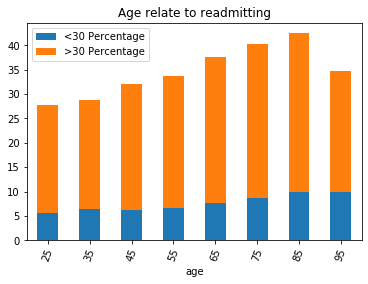

In [19]:
# Age relate to readmitting


re1 = df[df['readmitted'] == ">30"]
re2 = df[df['readmitted'] == "<30"]
re3 = df[df['readmitted'] == "NO"]


Percentage_bigger30 = re1.groupby('age')['readmitted'].count().reset_index()
Percentage_smaller30 = re2.groupby('age')['readmitted'].count().reset_index()
Percentage_no = re3.groupby('age')['readmitted'].count().reset_index()

Percentage_Readmitted = df.groupby('age')['readmitted'].count().reset_index()
Percentage_Readmitted['>30 Percentage'] = 100 * Percentage_bigger30['readmitted']  / Percentage_Readmitted['readmitted']
Percentage_Readmitted['<30 Percentage'] = 100 * Percentage_smaller30['readmitted']  / Percentage_Readmitted['readmitted']
Percentage_Readmitted['No'] = 100 * Percentage_no['readmitted']  / Percentage_Readmitted['readmitted']


#totalss['Percentage'] = 100 * totalss['readmitted']  / totalss['readmitted'].sum()

#Percentage_Readmitted = combined.groupby('age')['readmitted'].count().reset_index()
#Percentage_Readmitted['Percentage'] = 100 * Percentage_Readmitted['readmitted']  / Percentage_Readmitted['readmitted']
#df.loc[df.age == 25, 'readmitted'].count()

y_data = {">30 Percentage","<30 Percentage"}

print(Percentage_Readmitted)

Percentage_Readmitted.plot.bar(stacked=True, y=y_data, x="age", rot=70, title="Age relate to readmitting");



## b. African Americans are more likely to be re-admitted than other ethnic groups.

              race  readmitted  >30 Percentage  <30 Percentage         No
0  AfricanAmerican        3515       24.637269        8.392603  66.970128
1            Asian         145       27.586207        6.206897  66.206897
2        Caucasian       13211       30.694119        7.985769  61.320112
3         Hispanic         331       25.377644        5.740181  68.882175
4            Other         305       29.836066        6.229508  63.934426


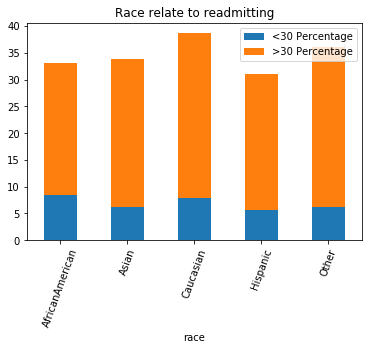

In [20]:

Percentage_bigger30 = re1.groupby('race')['readmitted'].count().reset_index()
Percentage_smaller30 = re2.groupby('race')['readmitted'].count().reset_index()
Percentage_no = re3.groupby('race')['readmitted'].count().reset_index()

Percentage_Readmitted = df.groupby('race')['readmitted'].count().reset_index()
Percentage_Readmitted['>30 Percentage'] = 100 * Percentage_bigger30['readmitted']  / Percentage_Readmitted['readmitted']
Percentage_Readmitted['<30 Percentage'] = 100 * Percentage_smaller30['readmitted']  / Percentage_Readmitted['readmitted']
Percentage_Readmitted['No'] = 100 * Percentage_no['readmitted']  / Percentage_Readmitted['readmitted']


#totalss['Percentage'] = 100 * totalss['readmitted']  / totalss['readmitted'].sum()

#Percentage_Readmitted = combined.groupby('age')['readmitted'].count().reset_index()
#Percentage_Readmitted['Percentage'] = 100 * Percentage_Readmitted['readmitted']  / Percentage_Readmitted['readmitted']
#df.loc[df.age == 25, 'readmitted'].count()

y_data = {">30 Percentage","<30 Percentage"}

print(Percentage_Readmitted)

Percentage_Readmitted.plot.bar(stacked=True, y=y_data, x="race", rot=70, title="Race relate to readmitting");

## c. Women patients are more likely to be re-admitted than men.

   gender  readmitted  >30 Percentage  <30 Percentage         No
0  Female        9371       29.601964        8.014086  62.383950
1    Male        8136       29.031465        7.940020  63.028515


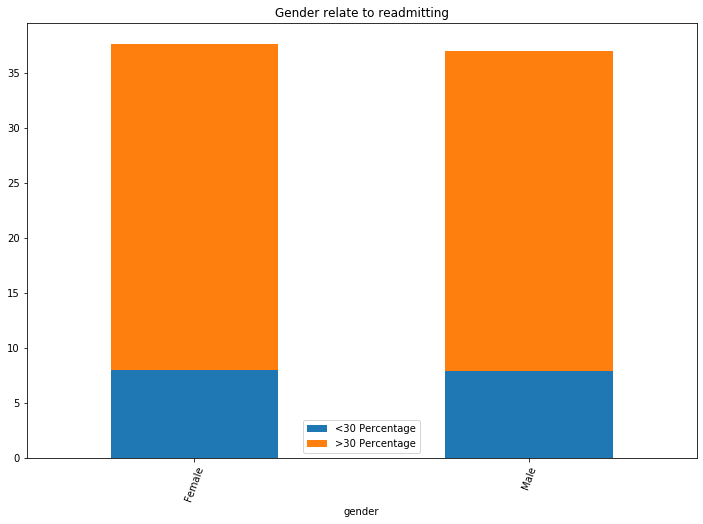

In [48]:

Percentage_bigger30 = re1.groupby('gender')['readmitted'].count().reset_index()
Percentage_smaller30 = re2.groupby('gender')['readmitted'].count().reset_index()
Percentage_no = re3.groupby('gender')['readmitted'].count().reset_index()

Percentage_Readmitted = df.groupby('gender')['readmitted'].count().reset_index()
Percentage_Readmitted['>30 Percentage'] = 100 * Percentage_bigger30['readmitted']  / Percentage_Readmitted['readmitted']
Percentage_Readmitted['<30 Percentage'] = 100 * Percentage_smaller30['readmitted']  / Percentage_Readmitted['readmitted']
Percentage_Readmitted['No'] = 100 * Percentage_no['readmitted']  / Percentage_Readmitted['readmitted']


#totalss['Percentage'] = 100 * totalss['readmitted']  / totalss['readmitted'].sum()

#Percentage_Readmitted = combined.groupby('age')['readmitted'].count().reset_index()
#Percentage_Readmitted['Percentage'] = 100 * Percentage_Readmitted['readmitted']  / Percentage_Readmitted['readmitted']
#df.loc[df.age == 25, 'readmitted'].count()

y_data = {">30 Percentage","<30 Percentage"}

print(Percentage_Readmitted)

Percentage_Readmitted.plot.bar(figsize=(12, 8),stacked=True, y=y_data, x="gender", rot=70, title="Gender relate to readmitting");

## d. Diagnose types have a higher impact on re-admission rates. For this purpose, you need to take into account the icd_codes and plot say diag_1 vs readmitted.

In [49]:
# diag relate to readmitting

re1 = df[df['readmitted'] == ">30"]
re2 = df[df['readmitted'] == "<30"]
re3 = df[df['readmitted'] == "NO"]


Percentage_bigger30 = re1.groupby('Description')['readmitted'].count().reset_index()
Percentage_smaller30 = re2.groupby('Description')['readmitted'].count().reset_index()
Percentage_no = re3.groupby('Description')['readmitted'].count().reset_index()

Percentage_Readmitted = df.groupby('Description')['readmitted'].count().reset_index()
Percentage_Readmitted2 = df.groupby('diag_1')['readmitted'].count().reset_index()

#check all missing Description value and fill with 0
for index, row in Percentage_Readmitted.iterrows():
    diag = Percentage_Readmitted.Description[index]
    if diag not in Percentage_bigger30['Description'].values:
        Percentage_bigger30 = Percentage_bigger30.append({'Description': diag,'readmitted' : 0}, ignore_index=True)
    if diag not in Percentage_smaller30['Description'].values:
        Percentage_smaller30 = Percentage_smaller30.append({'Description': diag,'readmitted' : 0}, ignore_index=True)
    if diag not in Percentage_no['Description'].values:
        Percentage_no = Percentage_no.append({'Description': diag,'readmitted' : 0}, ignore_index=True)

#sort the list and reset the index for the average calculation
Percentage_bigger30['Description'] = Percentage_bigger30['Description'].astype(str)
Percentage_bigger30 = Percentage_bigger30.sort_values('Description').reset_index()
Percentage_smaller30['Description'] = Percentage_smaller30['Description'].astype(str)
Percentage_smaller30 = Percentage_smaller30.sort_values('Description').reset_index()
Percentage_no['Description'] = Percentage_no['Description'].astype(str)
Percentage_no = Percentage_no.sort_values('Description').reset_index()

Percentage_Readmitted['>30 Percentage'] = 100 * Percentage_bigger30['readmitted']  / Percentage_Readmitted['readmitted']
Percentage_Readmitted['<30 Percentage'] = 100 * Percentage_smaller30['readmitted']  / Percentage_Readmitted['readmitted']
Percentage_Readmitted['No'] = 100 * Percentage_no['readmitted']  / Percentage_Readmitted['readmitted']


#totalss['Percentage'] = 100 * totalss['readmitted']  / totalss['readmitted'].sum()

#Percentage_Readmitted = combined.groupby('age')['readmitted'].count().reset_index()
#Percentage_Readmitted['Percentage'] = 100 * Percentage_Readmitted['readmitted']  / Percentage_Readmitted['readmitted']
#df.loc[df.age == 25, 'readmitted'].count()

y_data = {">30 Percentage","<30 Percentage"}


In [50]:
print(Percentage_Readmitted)

#537 rows here, probably some description are same, all row with description only have 534 rows
#print(Percentage_Readmitted2)

                                           Description  readmitted  \
0                      Abnormality of forces of labour           9   
1     Abnormality of organs and soft tissues of pelvis          15   
2                   Abscess of anal and rectal regions          19   
3                      Abscess of lung and mediastinum           5   
4                          Acquired deformities of toe           2   
..                                                 ...         ...   
529  Vertiginous syndromes and other disorders of v...          19   
530  Viral and chlamydial infection in conditions c...          12   
531                                    Viral hepatitis           3   
532                                    Viral pneumonia           1   
533                                Visual disturbances           1   

     >30 Percentage  <30 Percentage         No  
0         11.111111             0.0  88.888889  
1          6.666667             0.0  93.333333  
2         42

In [51]:
print(Percentage_bigger30)
print(Percentage_smaller30)
print(Percentage_no)

     index                                        Description  readmitted
0        0                    Abnormality of forces of labour           1
1        1   Abnormality of organs and soft tissues of pelvis           1
2        2                 Abscess of anal and rectal regions           8
3        3                    Abscess of lung and mediastinum           2
4        4                        Acquired deformities of toe           1
..     ...                                                ...         ...
529    360  Vertiginous syndromes and other disorders of v...           3
530    361  Viral and chlamydial infection in conditions c...           3
531    362                                    Viral hepatitis           1
532    363                                    Viral pneumonia           1
533    533                                Visual disturbances           0

[534 rows x 3 columns]
     index                                        Description  readmitted
0      233    

In [52]:
#analysing data and filtering data to avoid outliers
Percentage_Readmitted.describe()

,readmitted,>30 Percentage,<30 Percentage,No
count,534.000000,534.000000,534.000000,534.000000
mean,32.784644,25.615800,7.166257,67.217944
std,102.677661,26.059854,14.690827,28.446964
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,53.873824
50%,5.000000,25.000000,0.000000,66.666667
75%,19.000000,36.111450,9.195804,100.000000
max,1303.000000,100.000000,100.000000,100.000000


Text(0, 0.5, 'Percentage')

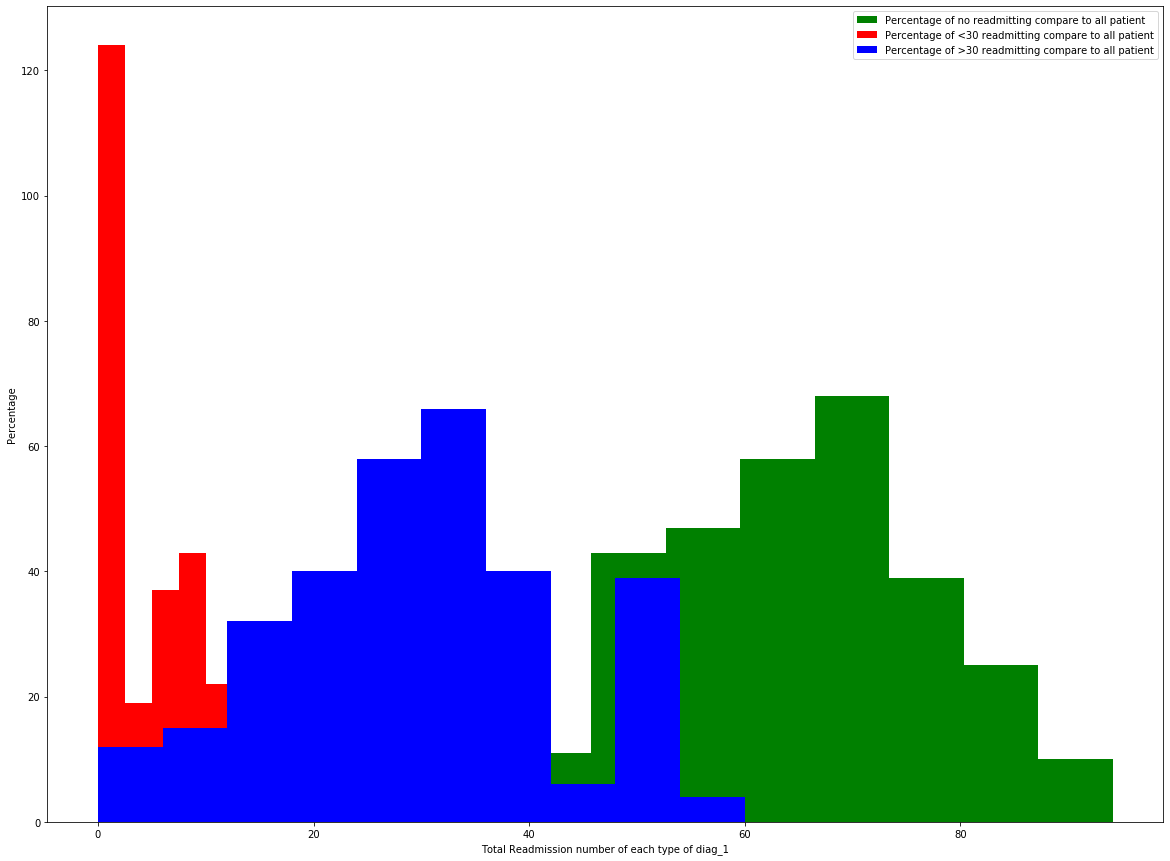

In [57]:
no_readmission = Percentage_Readmitted.plot.hist(x="readmitted", y="No", color="Green", label="Percentage of no readmitting compare to all patient")

smaller = Percentage_Readmitted.plot.hist(x="readmitted", y="<30 Percentage", color="Red", label="Percentage of <30 readmitting compare to all patient", ax=no_readmission)

bigger = Percentage_Readmitted.plot.hist(x="readmitted", y=">30 Percentage", color="Blue", label="Percentage of >30 readmitting compare to all patient", ax=no_readmission, figsize=(20, 15))

bigger.set_xlabel("Total Readmission number of each type of diag_1")
bigger.set_ylabel("Percentage")



Text(0, 0.5, 'Percentage')

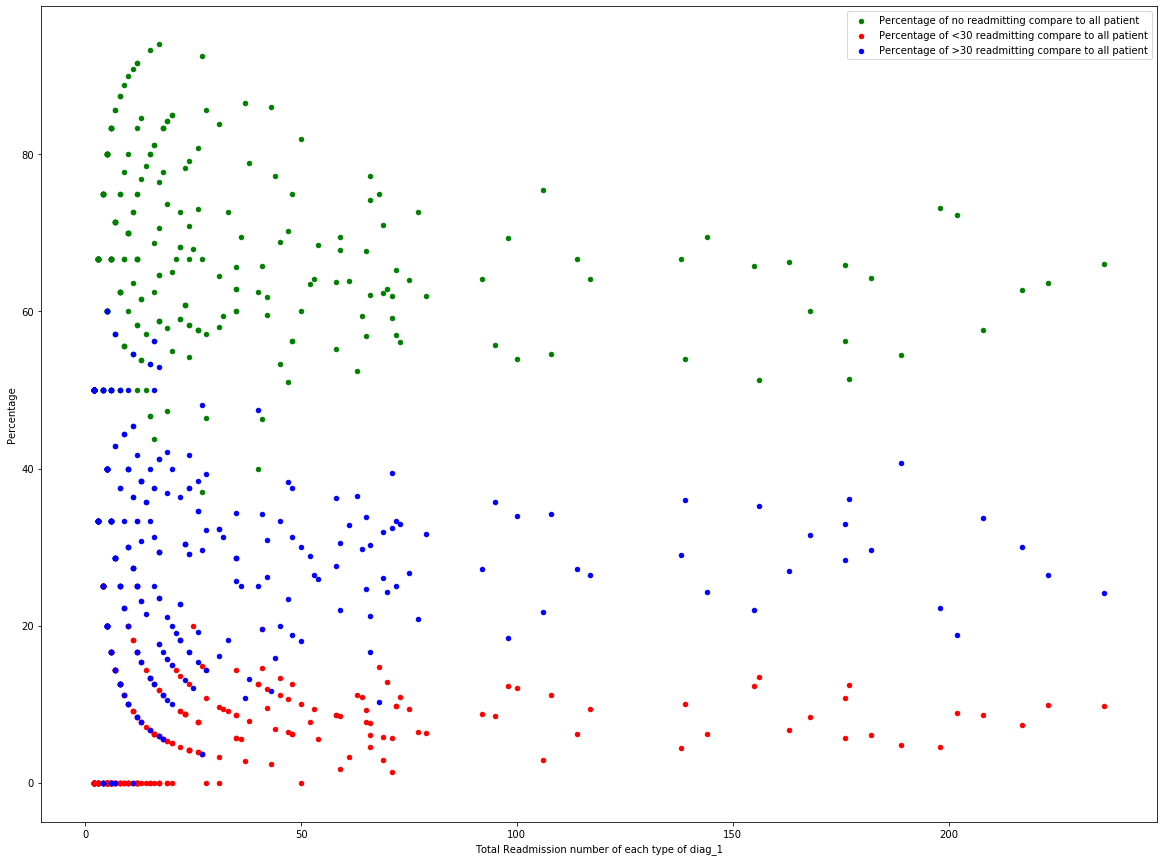

In [54]:
#Removing outliers to make a cleaner dataset
Percentage_Readmitted = Percentage_Readmitted[(Percentage_Readmitted['No'] >= 20) & (Percentage_Readmitted['No'] <= 95)]
Percentage_Readmitted = Percentage_Readmitted[(Percentage_Readmitted['readmitted'] <= 250)]

no_readmission = Percentage_Readmitted.plot.scatter(x="readmitted", y="No", color="Green", label="Percentage of no readmitting compare to all patient", figsize=(20, 15))
#Removing outliers to make a cleaner dataset
Percentage_Readmitted = Percentage_Readmitted[(Percentage_Readmitted['<30 Percentage'] <= 25)]
Percentage_Readmitted = Percentage_Readmitted[(Percentage_Readmitted['readmitted'] <= 250)]
#
smaller = Percentage_Readmitted.plot.scatter(x="readmitted", y="<30 Percentage", color="Red", label="Percentage of <30 readmitting compare to all patient", figsize=(20, 15), ax=no_readmission)
#Removing outliers to make a cleaner dataset
Percentage_Readmitted = Percentage_Readmitted[(Percentage_Readmitted['>30 Percentage'] <= 60)]
bigger = Percentage_Readmitted.plot.scatter(x="readmitted", y=">30 Percentage", color="Blue", label="Percentage of >30 readmitting compare to all patient", figsize=(20, 15), ax=no_readmission)

bigger.set_xlabel("Total Readmission number of each type of diag_1")
bigger.set_ylabel("Percentage")

smaller.set_xlabel("Total Readmission number of each type of diag_1")
smaller.set_ylabel("Percentage")

no_readmission.set_xlabel("Total Readmission number of each type of diag_1")
no_readmission.set_ylabel("Percentage")


# <font color=red>1.3 Modelling</font>

In [28]:
subset = ['num_medications', 'number_outpatient', 'number_emergency', 'time_in_hospital', 'number_inpatient', 'encounter_id', 'age', 'num_lab_procedures', 'number_diagnoses', 'num_procedures', 'readmitted']

In [29]:
df[subset].dtypes

num_medications        int64
number_outpatient      int64
number_emergency       int64
time_in_hospital       int64
number_inpatient       int64
encounter_id           int64
age                    int64
num_lab_procedures     int64
number_diagnoses       int64
num_procedures         int64
readmitted            object
dtype: object

In [30]:
df[subset[:-1]]

,num_medications,number_outpatient,number_emergency,time_in_hospital,number_inpatient,encounter_id,age,num_lab_procedures,number_diagnoses,num_procedures
20737,11,0,0,3,0,72848634,65,59,6,3
20824,9,0,0,4,0,73062156,95,56,6,1
21083,18,0,0,10,0,73731852,75,68,6,1
23879,19,0,0,12,0,81355914,75,77,5,5
23922,10,0,0,12,0,81458964,75,60,5,5
...,...,...,...,...,...,...,...,...,...,...
101249,19,0,0,10,0,436785812,75,59,9,1
101268,19,0,0,2,0,437270768,65,53,9,6
101278,14,1,0,7,0,437309498,65,54,2,4
101284,15,0,0,3,1,437331638,85,1,9,0


In [31]:
df['readmitted']

20737     NO
20824     NO
21083     NO
23879     NO
23922     NO
          ..
101249    NO
101268    NO
101278    NO
101284    NO
101286    NO
Name: readmitted, Length: 17507, dtype: object

In [32]:
print(df['readmitted'].unique())
# print(df.groupby(['readmitted']).count())

['NO' '>30' '<30']


In [33]:
df_readmitted = df['readmitted']
binary_readmitted = []

for x in df_readmitted:
    if x == 'NO':
        binary_readmitted.append(0)
    else:
        binary_readmitted.append(1)

df['binary_readmitted'] = binary_readmitted
df


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,Description,binary_readmitted
20737,72848634,20377854,Caucasian,Female,65,2,1,1,3,MC,...,No,No,No,No,Steady,No,Yes,NO,Aftercare involving intermittent dialysis,0
20824,73062156,20408121,Caucasian,Female,95,1,1,7,4,MC,...,No,No,No,No,No,No,Yes,NO,Duodenal ulcer,0
21083,73731852,20542797,Caucasian,Male,75,1,2,7,10,MC,...,No,No,No,No,Steady,Ch,Yes,NO,Other cellulitis and abscess,0
23879,81355914,7239654,Caucasian,Female,75,1,3,6,12,UN,...,No,No,No,No,Steady,No,Yes,NO,Neoplasm of uncertain behaviour of other and u...,0
23922,81458964,15466212,Caucasian,Male,75,1,3,6,12,MC,...,No,No,No,No,No,No,No,NO,Duodenal ulcer,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101249,436785812,87833862,Caucasian,Male,75,2,3,1,10,MC,...,No,No,No,No,Down,Ch,Yes,NO,Malignant neoplasm of brain,0
101268,437270768,124367945,Caucasian,Male,65,1,1,7,2,OG,...,No,No,No,No,Up,Ch,Yes,NO,Acute myocardial infarction,0
101278,437309498,52653654,Caucasian,Male,65,1,1,7,7,BC,...,No,No,No,No,No,No,Yes,NO,Other hernia of abdominal cavity with obstruct...,0
101284,437331638,142026269,Caucasian,Male,85,2,1,4,3,MC,...,No,No,Steady,No,Up,Ch,Yes,NO,Chronic bronchitis,0


In [34]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
glimepiride                 object
glipizide                   object
glyburide                   object
pioglitazone                object
rosiglitazone       

[0 1] [10974  6533]


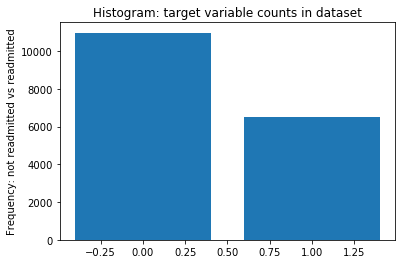

In [35]:
(unique, counts) = np.unique(df['binary_readmitted'], return_counts=True)
print(unique, counts)
plt.bar(unique, counts)
plt.ylabel('Frequency: not readmitted vs readmitted')
plt.title('Histogram: target variable counts in dataset')
plt.show()

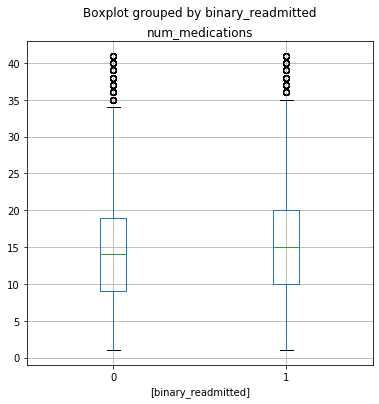

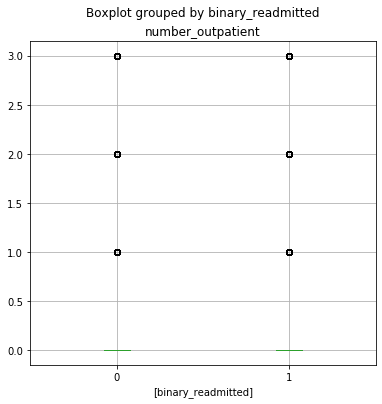

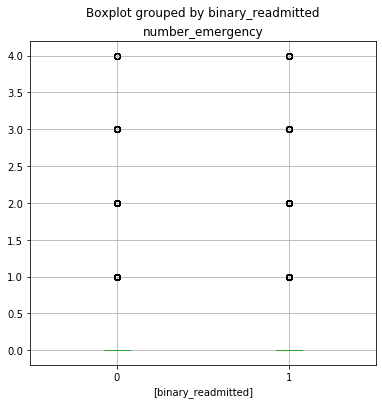

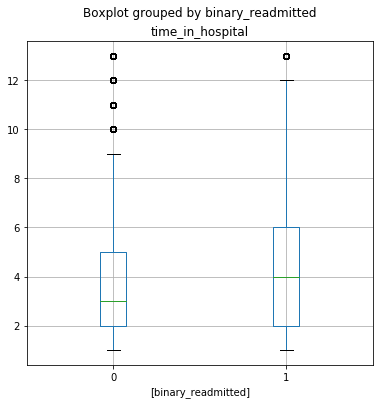

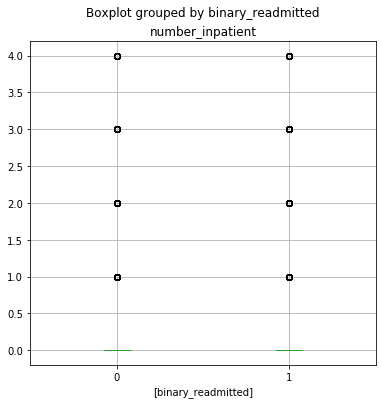

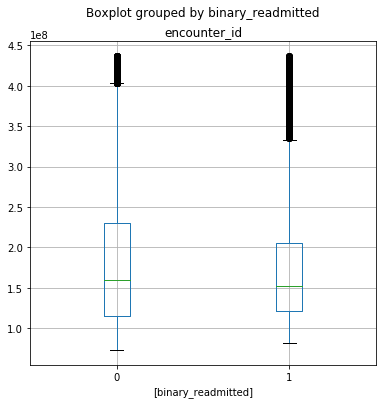

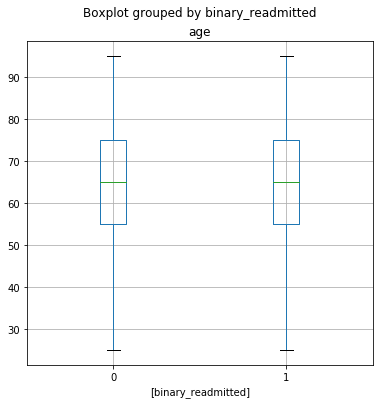

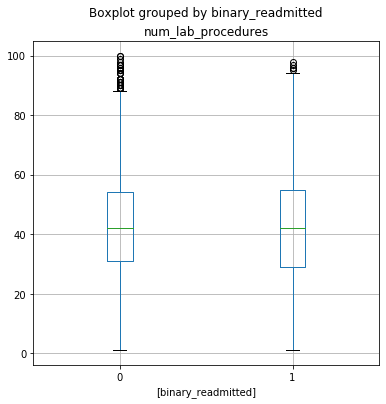

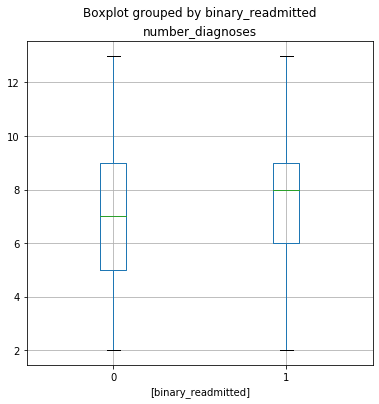

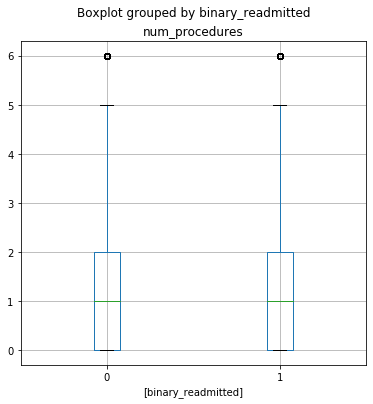

'Done'

In [36]:
def readmitted_boxplot(df, columns):
    for col in df[columns]:
        # print(col)
        fig = plt.figure(figsize=(6, 6))
        fig.clf()
        ax = fig.gca()
        df.boxplot(column=[col], ax=ax, by=['binary_readmitted'])
        plt.show()
    return('Done')
readmitted_boxplot(df, subset[:-1])

In [37]:
def readmitted_scatter(df, columns):
    for col in df[columns]:
        # print(col)
        fig = plt.figure(figsize=(7, 7))
        fig.clf()
        ax = fig.gca()
        df.plot(kind='scatter', x=[col], ax=ax, y='binary_readmitted')
        plt.show()
    return('Done')
# readmitted_scatter(df, list(selected_features))

In [38]:
#best features selection
#
from sklearn import linear_model, feature_selection

model = linear_model.LogisticRegression()
X0 = df.loc[:, subset[:-1]]
Y0 = df['binary_readmitted']
selector = feature_selection.RFE(model, n_features_to_select=7, step=1)     #from the box plot deducted the best ones to use
selector = selector.fit(X0, Y0)
selected_features = X0.loc[:, selector.support_]
print("Selected features:\n{}".format(',\n'.join(list(selected_features))))

Selected features:
num_medications,
time_in_hospital,
encounter_id,
age,
num_lab_procedures,
number_diagnoses,
num_procedures


In [39]:
#normalise the data for independent variables

df_norm = df[list(selected_features)]
df_norm = (df_norm - df_norm.min()) / (df_norm.max() - df_norm.min())
df_norm.describe()

,num_medications,time_in_hospital,encounter_id,age,num_lab_procedures,number_diagnoses,num_procedures
count,17507.000000,17507.000000,17507.000000,17507.000000,17507.000000,17507.000000,17507.000000
mean,0.354424,0.253142,0.291870,0.590090,0.403393,0.460834,0.247101
std,0.184741,0.230093,0.218686,0.217391,0.198088,0.180315,0.292018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.225000,0.083333,0.126069,0.428571,0.292929,0.272727,0.000000
50%,0.325000,0.166667,0.230825,0.571429,0.414141,0.545455,0.166667
75%,0.475000,0.333333,0.411855,0.714286,0.535354,0.636364,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#train data
X = df_norm
y = df['binary_readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

# Build up the logistic model with training set
model = LogisticRegression()
model.fit(X_train, y_train)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
X = df_norm
Y = df['binary_readmitted']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=0)
clf = linear_model.LogisticRegression()
clf.fit(trainX, trainY)
predicted = clf.predict(testX)

print("Mean hits: {}".format(np.mean(predicted==testY)))
print("Accuracy score: {}".format(metrics.accuracy_score(testY, predicted)))
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring='accuracy', cv=10)
print("Cross validation mean scores: {}".format(scores.mean()))

Mean hits: 0.6293546544831525
Accuracy score: 0.6293546544831525
Cross validation mean scores: 0.6298620543362977


In [42]:
from sklearn.metrics import accuracy_score

##Evaluation

# predict the outcome for the test data
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)     #to check if train match with test

accuracy_train = accuracy_score(pred_train, y_train)
print('Accuracy for the training set = {:0.3f}'.format(accuracy_train))
## Acuracy score for the test data
accuracy_test = accuracy_score(pred_test, y_test)
print('Accuracy for the test set = {:0.3f}'.format(accuracy_test))


Accuracy for the training set = 0.635
Accuracy for the test set = 0.628


In [43]:
from sklearn.metrics import confusion_matrix

# confusion matrix for the test data: it is the matrix that come with TP, TN, FN, FP
pred = pred_test
cm = confusion_matrix(y_test, pred)

TN, FP, FN, TP = confusion_matrix(y_test, pred_test).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  238
False Positive(FP) =  187
True Negative(TN)  =  2510
False Negative(FN) =  1442
Accuracy of the binary classification = 0.628


In [44]:
print(cm)

[[2510  187]
 [1442  238]]


In [45]:
from sklearn.metrics import classification_report

classification_report(y_test, pred_test)

'              precision    recall  f1-score   support\n\n           0       0.64      0.93      0.76      2697\n           1       0.56      0.14      0.23      1680\n\n    accuracy                           0.63      4377\n   macro avg       0.60      0.54      0.49      4377\nweighted avg       0.61      0.63      0.55      4377\n'

In [46]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred)

0.5361651835372636

In [47]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, pred)
plt.show()

AttributeError: type object 'RocCurveDisplay' has no attribute 'from_predictions'

# <font color=red>Improved model</font>

In [ ]:
df.head(5)

In [ ]:
for column in df.columns:
    if column[-3:] == '_id':
        df.drop([column], axis=1, inplace=True)


df.drop(['patient_nbr'], axis=1, inplace=True)
df.drop(['readmitted'], axis=1, inplace=True)
df.drop(['number_emergency'], axis=1, inplace=True)

df

In [ ]:
df_gender = pd.get_dummies(df, columns=['gender'])
df.drop(['gender'], axis=1, inplace=True)
df['gender_Female'] = pd.to_numeric(df_gender['gender_Female'])

df_race = pd.get_dummies(df, columns=['race'])
df.drop(['race'], axis=1, inplace=True)
df['race_AfricanAmerican'] = pd.to_numeric(df_race['race_AfricanAmerican'])
df

In [ ]:
from seaborn import pairplot

# pairplot(df)

In [ ]:
# df.dtypes

In [ ]:
# subset = subset[:-1]
# subset.remove('number_emergency')
# subset.append('binary_readmitted')
# df[subset].describe()



In [ ]:
def trim(df):
    for features in df:
        ##mean = df[features].mean()
        mean = np.mean(df[features])
        std = np.std(df[features])
        df = df[(df[features] >= mean-(2*std)) & (df[features] <= mean+(2*std))]
    return df



df_trimmed = trim(df.select_dtypes(include=numerics))
# y = trim(y)
df_trimmed.describe()

In [ ]:
# readmitted_boxplot(df_trimmed, subset[:-1])

In [ ]:
#normalise the data for independent variables

# df_trimmed.dropna('number_emergency', inplace=True)

# df_norm = df_trimmed[subset[:-1]]

df_norm = df_trimmed
df_norm = (df_norm - df_norm.min()) / (df_norm.max() - df_norm.min())
# df_norm.describe()


In [ ]:
y = df_norm['binary_readmitted']
df_norm.drop(['binary_readmitted'], axis=1, inplace=True)
y

In [ ]:
X = df_norm
X

In [ ]:



#train data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

# Build up the logistic model with training set
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:

##Evaluation

# predict the outcome for the test data
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)     #to check if train match with test

accuracy_train = accuracy_score(pred_train, y_train)
print('Accuracy for the training set = {:0.3f}'.format(accuracy_train))
## Acuracy score for the test data
accuracy_test = accuracy_score(pred_test, y_test)
print('Accuracy for the test set = {:0.3f}'.format(accuracy_test))

In [ ]:
# confusion matrix for the test data: it is the matrix that come with TP, TN, FN, FP
pred = pred_test
cm = confusion_matrix(y_test, pred)

TN, FP, FN, TP = confusion_matrix(y_test, pred_test).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

In [ ]:
print(cm)
print(classification_report(y_test, pred_test))
roc_auc_score(y_test, pred)

In [ ]:
RocCurveDisplay.from_predictions(y_test, pred)
plt.show()